Python for Data Analysis, GMC, Vilnius University, 2025

# HW3: Exploratory Data Analysis (EDA)

- **Tasks in this homework are built around this file:** https://github.com/Tallivm/vu-python/raw/refs/heads/main/plantdata.npy. Download it beforehand and put into the same folder as your Notebook.
- You will need to import these packages: `numpy`, `pandas`, `matplotlib`, `urllib`, `json`. You are also allowed to import `tqdm` and `itertools`. Do not import any other packages.
- **You will need to upload your solutions into your Github repository** dedicated for the Python for Data Analysis course. Either make it public, or keep private but add Taisija as a collaborator (nickname: Tallivm).
- Write at least one custom function somewhere, but it is not required to put everything into functions. Do not write docstrings (function description comments).
- Keep prints informative.
- Do not create classes (you shouldn't know yet what are those).
- Do not change assert statements.

There are 5 tasks in this Notebook. They have slightly different numbers of points between them, with subpoints shown for each subtask e.g. (0.2p). You need to collect 8 points in total to get the maximum grade.

As previously, each task consists of a text cell with task description, a code cell to solve the task, and a code cell with `assert` statements to check your code for *some* possible errors.

Don't hesitate to contact me or Martynas if you are stuck.

In [1]:
# your imports
import numpy as np
import pandas as pd
import urllib
import json
import matplotlib.pyplot as plt
from itertools import product

# 🔃 Task 1 (1 point): Load and examine the data

There is a lab called SNAILAB which studies various snails and their secretion as a cosmetic and pharmaceutical ingredient. SNAILAB researchers know that properties of snail secretion depend on what snails ate in last days. As snails aren't very fast animals, they tend to sit on plants they eat, meaning researchers can take plant samples directly under snails to research their diets.

The "plantdata.npy" file is a Numpy array containing some of those measurements.
- (0.1p) Load it into this Notebook as `raw_data`.
- (0.1p) Print out the shape and type of data.
- (0.4p) Calculate and save the total number of missing values as `n_missing`. Print out the ratio of total missing values in data.
- (0.4p) For each **numeric** data column, print out the minimum, average, median, and maximum values. Ignore missing values.

*Do not use Pandas for Task 1.*

In [50]:
# your code
raw_data = np.load('plantdata.npy')
print(f"Raw data shape: {raw_data.shape}")
print(f"Raw data data type: {raw_data.dtype}")
n_missing = np.count_nonzero(np.isnan(raw_data))
print(f"Missing ratio: {n_missing / raw_data.size:.3f}")

mins = np.nanmin(raw_data, axis=0)
maxes = np.nanmax(raw_data, axis=0)
means = np.nanmean(raw_data, axis=0)
medians = np.nanmedian(raw_data, axis=0)

title = f"{'Column':<8} {'Min':>6} {'Mean':>8} {'Median':>8} {'Max':>8}"
print(title)
print("-" * len(title))

for i in range(raw_data.shape[1]):
    print(f"{i:<8} {mins[i]:>6.2f} {means[i]:>8.2f} {medians[i]:>8.2f} {maxes[i]:>8.2f}")





Raw data shape: (15434, 12)
Raw data data type: float64
Missing ratio: 0.113
Column      Min     Mean   Median      Max
------------------------------------------
0          0.80    97.52    98.10   144.00
1          0.00     0.30     0.30     1.00
2          4.00   127.41   128.00   228.00
3          0.00     1.59     2.00     4.00
4          0.00     0.50     0.00     2.00
5          1.70    42.21    42.60    78.20
6          0.00     3.66     5.00    12.00
7          2.00    38.37    39.00    71.00
8          0.00     1.51     2.00     4.00
9          0.10    84.14     1.50  3322.00
10         0.28    15.29    12.27    92.88
11         0.00     4.58     3.68    28.12


In [3]:
assert type(raw_data) == np.ndarray
assert n_missing == 20873

# 👍 Task 2 (1 point): Make data more convenient to work with



Because the dataset is a 2D table, it should be much easier to work with it using Pandas.
- (0.1p) Create a DataFrame containing data from the Numpy array. Name it `raw_df`.
- (0.2p) Using `urllib`, load a data sheet for this dataset, which is a JSON file (https://raw.githubusercontent.com/Tallivm/vu-python/refs/heads/main/plant_datasheet.json). Name the result `datasheet`.
- (0.3p) Create a copy of `raw_df` named `named_df`. Use `datasheet` to correctly name `named_df` columns.
- (0.4p) Use the "mapping" keyword from `datasheet` to replace values in certain columns of `named_df` into strings. Don't write names of data columns directly in Notebook - make it automatic. Make sure `raw_df` stays unchanged.

In [4]:
# your code
raw_df = pd.DataFrame(raw_data)
raw_df
url = "https://raw.githubusercontent.com/Tallivm/vu-python/refs/heads/main/plant_datasheet.json"

with urllib.request.urlopen(url) as res:
    datasheet = json.load(res)


named_df = raw_df.copy()
named_df.columns = datasheet['column names']

for column_name, map_dict in datasheet['mapping'].items():
    if column_name in named_df.columns:
        inv = {float(v): k for k, v in map_dict.items()}
        named_df[column_name] = named_df[column_name].map(inv)
named_df

,plant_height,stem_bending,leaf_size,leaf_shape_type,leaf_surface_type,flower_radius,n_petals,petal_size,petal_color,snail_age,snail_body_length,snail_eye_length
0,94.1,0.3,142.0,lanceolate,waxy,NaN,0.0,NaN,NaN,2.3,23.018103,7.059426
1,109.4,0.1,138.0,elliptical,hairy,39.2,7.0,36.0,red,0.9,8.860228,2.946362
2,87.2,0.4,117.0,cordate,hairy,30.6,6.0,28.0,purple,0.4,4.163751,1.179329
3,106.2,0.2,151.0,ovate,smooth,NaN,0.0,NaN,NaN,3.6,35.867042,10.859839
4,103.1,0.2,115.0,cordate,hairy,48.5,5.0,44.0,white,2.3,22.520190,6.842169
...,...,...,...,...,...,...,...,...,...,...,...,...
15429,91.1,0.3,187.0,cordate,smooth,NaN,0.0,NaN,NaN,3.1,31.429531,9.286463
15430,84.4,0.5,113.0,lanceolate,hairy,NaN,0.0,NaN,NaN,1.6,16.237903,4.751757
15431,103.6,0.2,135.0,ovate,hairy,28.0,8.0,25.0,white,1.6,15.737375,4.489791
15432,115.8,0.2,141.0,ovate,smooth,NaN,0.0,NaN,NaN,1.6,16.010964,5.290070


In [5]:
assert type(raw_df) == pd.DataFrame
assert type(named_df) == pd.DataFrame
assert type(datasheet) == dict
assert raw_df.columns[0] == 0
assert named_df.columns[0] == 'plant_height'
assert named_df.loc[1, 'petal_color'] == 'red'

# 🔎 Task 3 (1 point): Detect problematic values

- (0.1p) Print out the number of missing values for each column in `named_df`.
- (0.1p) For each **categorical** column, print out its unique values.
- (0.3p) Plot and show a boxplot for each **numeric** column. It should be a single boxplot with all feature "boxes" side-by-side. Make sure all labels are readable and nothing overlaps on the plot.
- (0.5p) Using the IQR approach, count and print out the number of outliers in each **numeric** column. Save the total number of outliers into a variable `n_outliers_total`.
   - Any data point below $Q1 - 1.5 \text{IQR}$ or above $Q3 + 1.5 \text{IQR}$ can be considered an outlier.
   - $Q1$ is the 25% percentile, $Q3$ is the 75% percentile.
   - $\text{IQR} = Q3-Q1$.
   - Ignore missing values.


In [88]:
# your code
missing = named_df.isna().sum()
title = f"|{'Column':>12} {'|':>8} {'Missing counts':>6}|"
print(title)
print("-" * len(title))
for i in range(len(missing)):
   print(f"| {missing.index[i]:<19}| {missing.values[i]:>6}{'|':>9}")
print("-" * len(title))

uniques = {
    column_name: named_df[column_name].unique()
    for column_name in named_df.select_dtypes('object').columns
}
for key, names_list in uniques.items():
    names_str_list = [str(x) for x in names_list]
    print(f"\'{key}\' unique values: " + ", ".join(names_str_list))

|      Column        | Missing counts|
--------------------------------------
| plant_height       |      0        |
| stem_bending       |      7        |
| leaf_size          |      4        |
| leaf_shape_type    |      0        |
| leaf_surface_type  |      0        |
| flower_radius      |   6945        |
| n_petals           |      0        |
| petal_size         |   6945        |
| petal_color        |   6945        |
| snail_age          |      8        |
| snail_body_length  |      8        |
| snail_eye_length   |     11        |
--------------------------------------
'leaf_shape_type' unique values: lanceolate, elliptical, cordate, ovate, reniform
'leaf_surface_type' unique values: waxy, hairy, smooth
'petal_color' unique values: nan, red, purple, white, yellow, blue


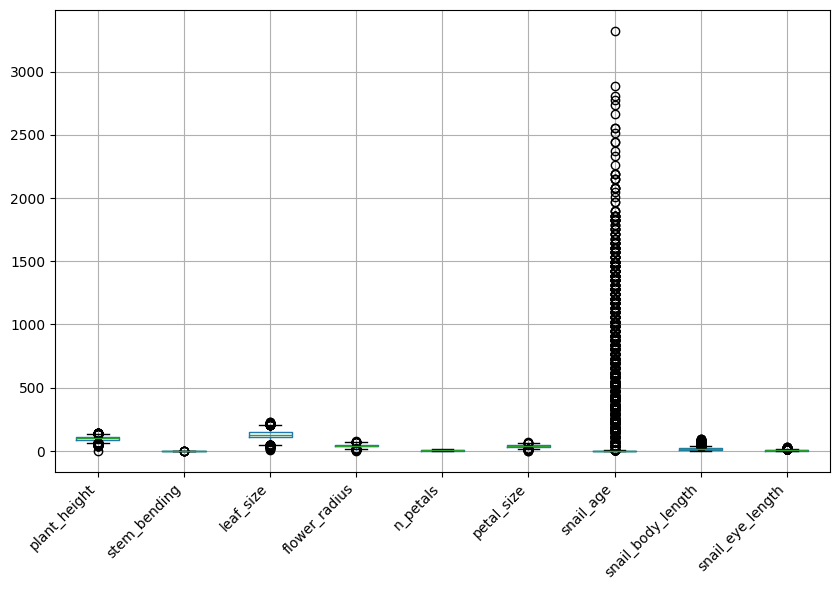

In [7]:
num_only_df = named_df.select_dtypes(include="number")
plt.figure(figsize=(10, 6))

num_only_df.boxplot()
plt.xticks(rotation=45, ha="right")
plt.show()
plt.close()

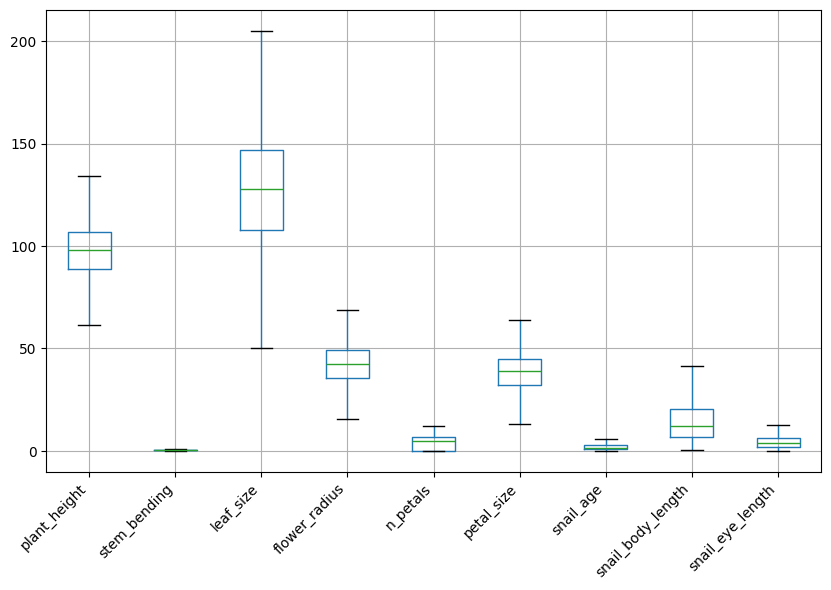

In [8]:
plt.figure(figsize=(10, 6))

num_only_df.boxplot(showfliers=False)
plt.xticks(rotation=45, ha="right")
plt.show()
plt.close()

In [110]:
def count_outliers(data_column) -> int:
    nanless_column = data_column.dropna()
    q_1 = nanless_column.quantile(0.25)
    q_3 = nanless_column.quantile(0.75)
    iqr = q_3 - q_1

    low_out = q_1 - 1.5 * iqr
    hight_out = q_3 + 1.5 * iqr
    outliers = nanless_column[((nanless_column < low_out) |
                                (nanless_column > hight_out))]
    return len(outliers)

outliers_by_column = {
    column_name: count_outliers(num_only_df[column_name]) for column_name in num_only_df.columns
    }


title = f"|{'Column':>12} {'|':>8} {'Outliers':>6} |"
print(title)
print("-" * len(title))
for key, outliers_in_column in outliers_by_column.items():
    print(f"| {key:<19}| {outliers_in_column:>6} {'|':>3}")

print("-" * len(title))


n_outliers_total = sum(outliers_in_column for outliers_in_column in outliers_by_column.values())

|      Column        | Outliers |
---------------------------------
| plant_height       |    148   |
| stem_bending       |      6   |
| leaf_size          |    129   |
| flower_radius      |      0   |
| n_petals           |      0   |
| petal_size         |      0   |
| snail_age          |    568   |
| snail_body_length  |    575   |
| snail_eye_length   |    562   |
---------------------------------


In [10]:
assert n_outliers_total == 3917

# 🧼 Task 4 (2 points): Clean the data

The `snail_age` column certainly looks strange. Some data cleaning may be needed. After sending the initial analysis to SNAILAB researchers, one of them sent you an email with some additional information:

________________

*Thanks for flagging those issues in the dataset. Let me clarify some things.*

*So the data came from several independent biologists working in different locations, and unfortunately they weren't all using the same units for snail age - some recorded it in years while others used days. You'll need to use a bit of common sense to figure out which is which, keeping in mind that some snails can live up to 10-15 years. For the cleaned dataset, we'd like everything standardized to years.*

*Regarding the missing values, it's a bit nuanced. In some cases, a missing value means someone simply forgot to take that measurement, and we want those samples removed entirely from the analysis. But many missing values are actually meaningful because that measurement was impossible to get - please replace those with an appropriate constant like 0 or "N/A".*

*One more thing about the body measurements: we measured body length from the tip of the snail's tail all the way to the tip of the right eye tentacle. Biologically speaking, the eye tentacles can't be longer than about 40% of the total body length, so if you're seeing values that exceed that, they're definitely measurement errors. We'd like you to replace those incorrect eye length values using 20% of the corresponding body length.*

________________

- (1.2p) According to this new information, get a new DataFrame called `clean_df` which **should not have any missing values** whatsoever. Keep `named_df` unchanged. For any removed or replaced missing values, add a comment with brief explanation why it was done.
- (0.3p) Repair the eye length column.
- (0.4p) Repair the snail age column. Plot two histograms for the snail age data, before and after, side by side. Increase the number of bins in plots for better resolution.
- (0.1p) Repeat the boxplot from Task 3 but with `clean_df`.

*Do not remove or replace outliers, leave them in the data.*

In [11]:
# your code
clean_df = named_df.copy()
# We delete all rows, where age == Nan, because we could not
# determine it using the information available in the dataset
index = clean_df.index[clean_df['snail_age'].isna()]
print(f"Deleting rows with indicies: {index.values}, due to 'Nan' value in 'snail_age' column")
clean_df = clean_df.drop(index=index)

Deleting rows with indicies: [  452  5305  5979  7786  8251 12418 12927 14240], due to 'Nan' value in 'snail_age' column


In [12]:
# If the number of petals (n_petals) == 0, this means that
# the plant does not have or did not have petals at the moment of measurement.
# In the dataset, we have several columns that depend on the presence of petals:
# 1) 'flower_radius';
# 2) 'petal_size';
# 3) 'petal_color'.
# Obviously, if a plant has no petals (n_petals == 0), then 'flower_radius' and 'petal_size'
# can be replaced with 0.0 instead of NaN, because a radius or size equal
# to 0.0 is equivalent to “no measurement” (NaN) in this context.
# For the categorical variable petal_color, since there is no flower,
# the NaN can also be replaced with 'N/A' for the same reason.

zero_petals_index = clean_df.index[clean_df['n_petals'] == 0.0]
dependend_column_names_numerics = ['flower_radius', 'petal_size', 'petal_color']
clean_df.loc[zero_petals_index, dependend_column_names_numerics] = 0.0
clean_df.loc[zero_petals_index, 'petal_color'] = 'N/A'

In [13]:
# NaN values in the 'leaf_size' and 'stem_bending' columns represents situation,
# then measurement was not taken. As requeried in the email, these rows have to be removed.
no_leaf_measurment_index = clean_df.index[clean_df['leaf_size'].isna()]
clean_df = clean_df.drop(index=no_leaf_measurment_index)
no_bending_measurment_index = clean_df.index[clean_df['stem_bending'].isna()]
clean_df = clean_df.drop(index=no_bending_measurment_index)

In [14]:
# Rows with NaN values in 'snail_body_length' and 'snail_eye_length' should also be removed.
# Although the email provides a formula for correcting measurement errors,
# in the case of NaN values the measurement was not taken, so as requested
# in the email such rows must be removed.
no_body_length_index = clean_df.index[clean_df['snail_body_length'].isna()]
clean_df = clean_df.drop(index=no_body_length_index)
no_eye_length_index = clean_df.index[clean_df['snail_eye_length'].isna()]
clean_df = clean_df.drop(index=no_eye_length_index)
clean_df.isna().sum() # Now dataset contains no 'NaN' values

,0
plant_height,0
stem_bending,0
leaf_size,0
leaf_shape_type,0
leaf_surface_type,0
flower_radius,0
n_petals,0
petal_size,0
petal_color,0
snail_age,0


In [15]:
def calculate_eyes_len(data_row) -> float:
    eye = data_row["snail_eye_length"]
    body = data_row["snail_body_length"]

    if eye > body * 0.4:
        return body * 0.2
    return eye
clean_df["snail_eye_length"] = clean_df.apply(calculate_eyes_len, axis=1)

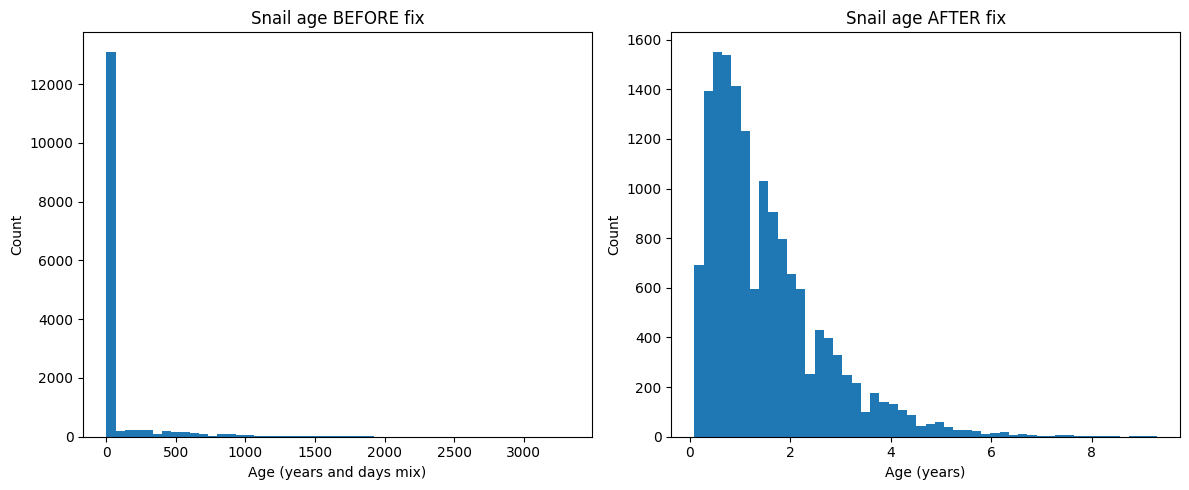

In [16]:
age_before_fix = clean_df["snail_age"].copy()

SNAIL_MAX_AGE_YEARS = 15.0
#  We divide the age by 365.25 (to account for leap years)
#  if the snail’s age is higher than 15.0,
#  which is the upper lifespan limit mentioned in the mail.
clean_df['snail_age'] = clean_df['snail_age'].map(
    lambda x: x if x <= SNAIL_MAX_AGE_YEARS else x / 365.25
)
age_after_fix = clean_df["snail_age"]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(age_before_fix, bins=50)
plt.title("Snail age BEFORE fix")
plt.xlabel("Age (years and days mix)")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(age_after_fix, bins=50)
plt.title("Snail age AFTER fix")
plt.xlabel("Age (years)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()
plt.close()


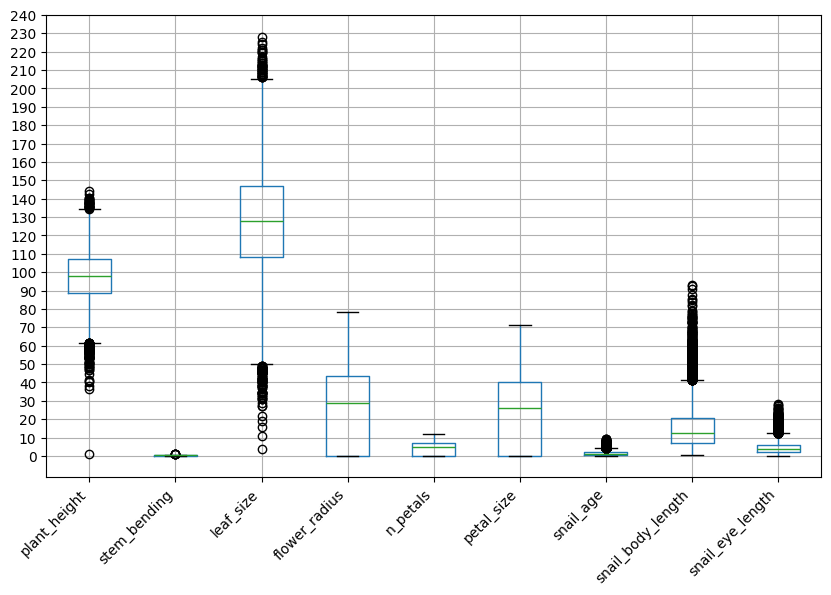

In [17]:
num_only_df = clean_df.select_dtypes(include="number")
plt.figure(figsize=(10, 6))

num_only_df.boxplot()
plt.xticks(rotation=45, ha="right")
plt.yticks(range(0, 250, 10))
plt.show()
plt.close()

# 🖼️ Task 5 (3 points): Visualize the data

You were asked to create some beautiful EDA plots from `clean_df`. Create 3 plots in total. You will need to save each of them as a PDF image (filenames are provided), as well as output in the Notebook. Make sure everything is readable on the plot, no overlapping parts, cropped/unreadable texts, etc.

1. (1p) **Feature distributions** ("data_features.pdf")
   - A subplot grid (so, at least 2 rows or 2 columns), with as many subplots as there are features (columns) in the data.
   - For each feature, plot either histogram or barplot depending on whether the feature is numeric (continuous/ranked) or categorical. The determination of feature type should be automatic, without manually writing column names as strings anywhere.
   - For each numeric feature, add a red dashed vertical line indicating the average, and a green dashed vertical line for the median.
   - Each histogram should have a title (feature name).
   - Increase bin numbers for better resolution.
   - Color all histograms in a color of your choice.

2. (1p) **Feature correlations** ("data_correlation.pdf")
   - A heatmap showing Spearman's correlation coefficients between all **numeric** features (reminder: you cannot use `seaborn`).
   - The heatmap should have visible values (in [-100%, 100%] range, rounded), correct X and Y ticks (feature names), and a colorbar.
   - Use a diverging colormap and ensure that 0% correlation has the middle color (check `vmin` and `vmax` parameters).
   - The title of the plot should be "Spearman correlation between features".

3. (1p) **Scatterplots of least and most correlated features** ("data_relationships.pdf")
   - Two scatterplots side-by-side, first showing tho least correlated features, second - two most correlated.
   - Least and most correlated features should be found automatically from the correlation matrix calculated for the second plot. Autocorrelation doesn't  count. Keep in mind that -100% is a huge correlation, just negative.
   - Plots should have correctly named X and Y axes.
   - Plot titles should contain Spearman correlation coefficients.
   - Color dots according to the petal colors. Dot colors can be different from the color names used in data, but try to match them (except for the white color, obviously). Make dots smaller and more transparent than default ones.

/tmp/ipython-input-561637212.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value_counts.index.astype(str),
/tmp/ipython-input-561637212.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value_counts.index.astype(str),
/tmp/ipython-input-561637212.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value_counts.index.astype(str),


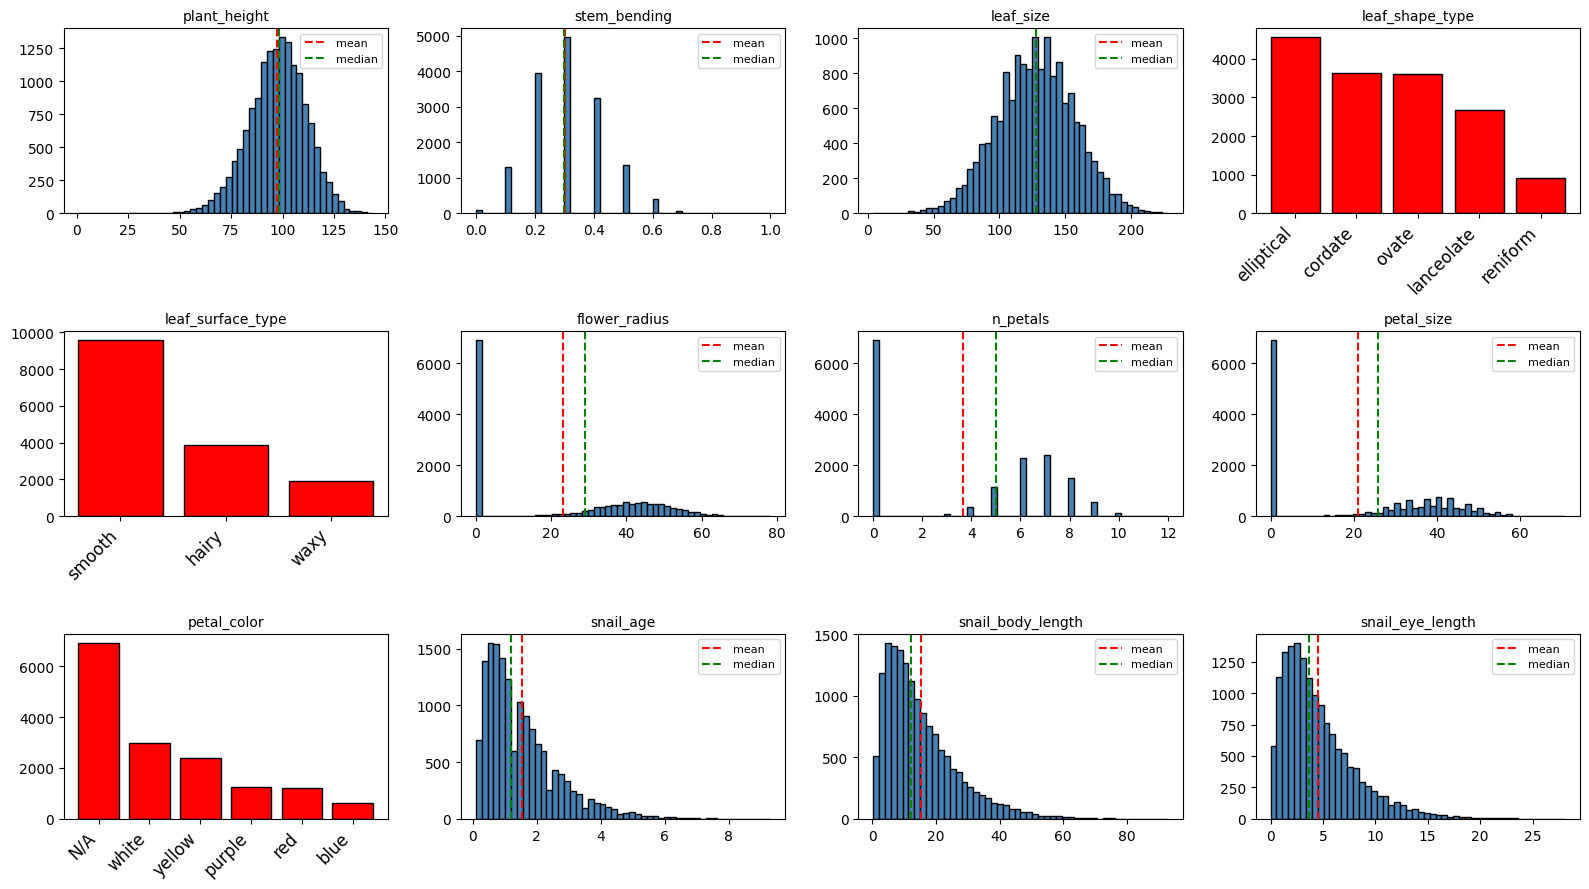

<Figure size 640x480 with 0 Axes>

In [18]:
# your code
numeric_columns = clean_df.select_dtypes(include='number').columns
categorial_columns = clean_df.select_dtypes(include='object').columns

fig, axes = plt.subplots(3, 4, figsize=(16, 9))
axes = axes.flatten()
for i, column_name in enumerate(clean_df.columns):
    ax = axes[i]
    series = clean_df[column_name]
    if column_name in numeric_columns:
        ax.hist(series, bins=50, color="steelblue", edgecolor="black")
        mean = series.mean()
        median = series.median()
        ax.axvline(mean, color="red", linestyle="--", label="mean")
        ax.axvline(median, color="green", linestyle="--", label="median")
        ax.legend(fontsize=8)

    elif column_name in categorial_columns:
        value_counts = series.value_counts()
        ax.bar(value_counts.index.astype(str),
               value_counts.values,
               color='red',
               edgecolor="black")
        ax.set_xticklabels(value_counts.index.astype(str),
                           rotation=45,
                           ha="right",
                           fontsize=12)

    ax.set_title(column_name, fontsize=10)


plt.tight_layout()
plt.show()
plt.savefig("data_features.pdf")
plt.close(fig)

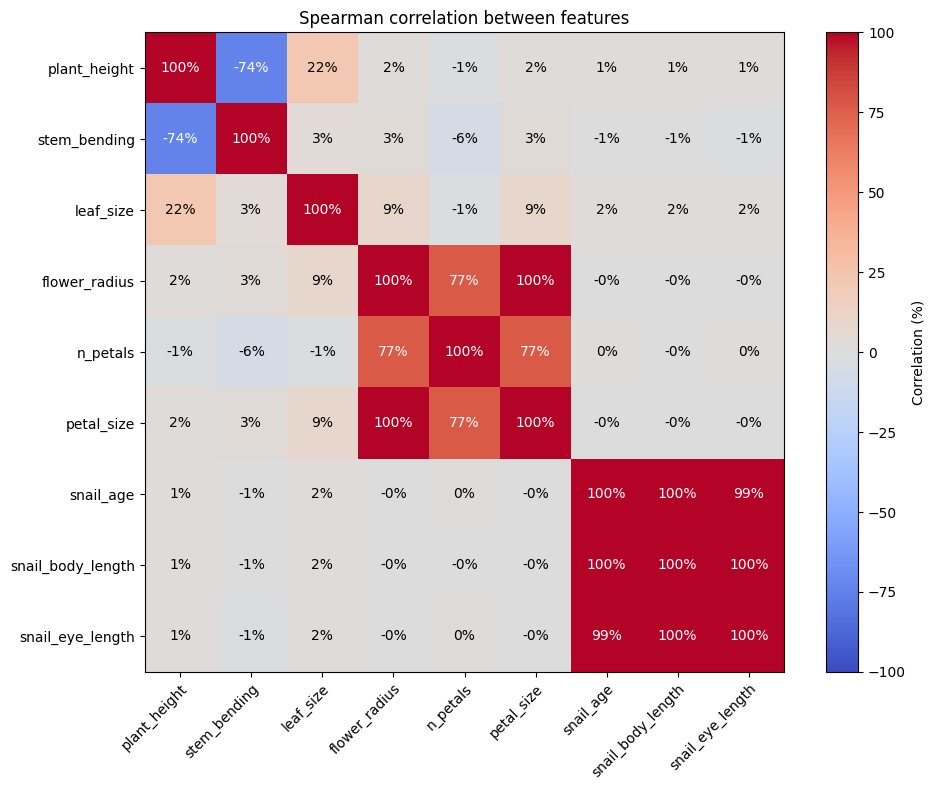

<Figure size 640x480 with 0 Axes>

In [19]:
corelation = clean_df.corr(method='spearman', numeric_only=True)
column_names = corelation.columns.values
row_names = corelation.index.values

corr_percent = corelation * 100
fig, ax = plt.subplots(figsize=(10, 8))

im = ax.imshow(
    corr_percent,
    cmap="coolwarm",
    vmin=-100,
    vmax=100,
)

ax.set_xticks(range(len(column_names)), labels=column_names,
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(row_names)), labels=row_names)

for i, j in product(range(len(column_names)), range(len(row_names))):
        value = corr_percent.iloc[i, j]
        ax.text(
            j, i,
            f"{value:.0f}%",
            ha="center",
            va="center",
            color="white" if abs(value) > 50 else "black"
        )

fig.colorbar(im, ax=ax, label="Correlation (%)")
ax.set_title("Spearman correlation between features")
plt.tight_layout()
plt.show()
plt.savefig("data_correlation.pdf")
plt.close(fig)

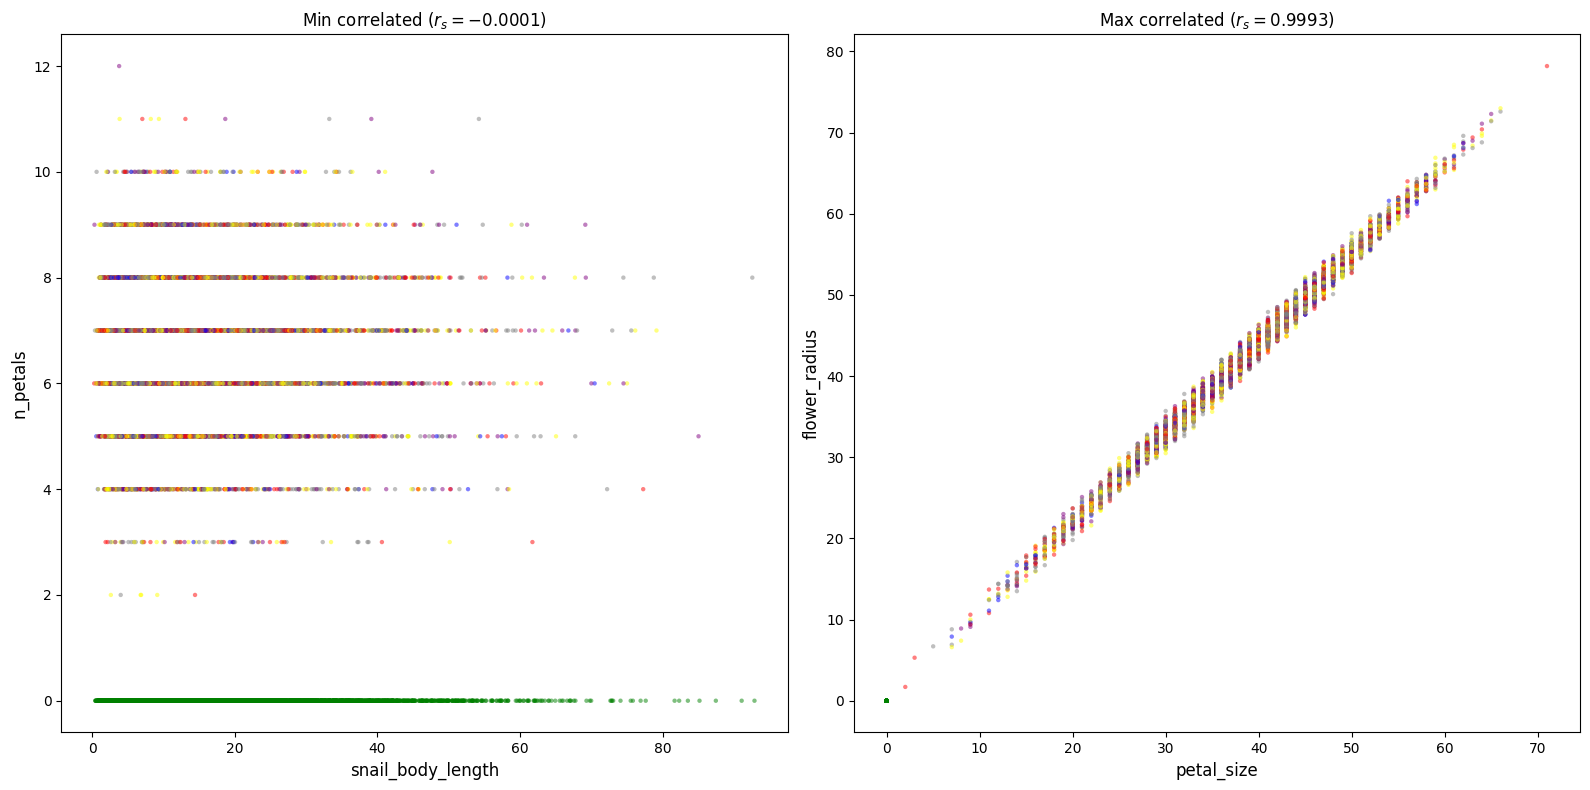

<Figure size 640x480 with 0 Axes>

In [120]:
columns_n, rows_n = corr_percent.shape
i, j = np.tril_indices(n=rows_n, k=-1, m=columns_n)
mask = np.full(corr_percent.shape, True, dtype=bool)
mask[i, j] = False
masked = np.ma.array(corr_percent, mask=mask)
masked_absolute = np.absolute(masked)
max_index = np.unravel_index(masked_absolute.argmax(), masked_absolute.shape)
min_index = np.unravel_index(masked_absolute.argmin(), masked_absolute.shape)
plot_idx = [min_index, max_index]

color_map = {
    "red": "red",
    "purple": "purple",
    "white": "grey",
    "yellow": "yellow",
    "blue": "blue",
    "N/A":"green"
}

title = ['Min', 'Max']
fig, axes = plt.subplots(1, len(title), figsize=(16, 8))
for i, title_name in enumerate(title):
    index = plot_idx[i]
    x = corr_percent.index[index[0]]
    y = corr_percent.columns[index[1]]
    corr_value = corelation.iloc[index]
    ax = axes[i]
    ax.scatter(
        clean_df[x],
        clean_df[y],
        s=10,
        alpha=0.5,
        c=clean_df["petal_color"].map(color_map),
        edgecolors="none"
    )
    ax_title = rf"{title_name} correlated ($r_s={corr_value:.4f}$)"
    ax.set_title(ax_title, fontsize=12)
    ax.set_xlabel(x, fontsize=12)
    ax.set_ylabel(y, fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig('data_relationships.pdf')
plt.close(fig)

In [21]:
import os  # do not delete this import
assert os.path.exists("data_features.pdf")
assert os.path.exists("data_correlation.pdf")
assert os.path.exists("data_relationships.pdf")

*Disclaimer: there is no lab called SNAILAB, and `plantdata.npy` is purely synthetic. Do not use this analysis to learn about snails. The data does not contain any information about the immortal snail. Do not use this analysis to evade the immortal snail. Evading the immortal snail is futile.*